In [25]:
# Access astronomical databases
from pyvo import registry  # version >=1.4.1 

# Moc and HEALPix tools
from mocpy import MOC

# Sky visualization
from ipyaladin import Aladin

# For plots
import matplotlib.pyplot as plt

ImportError: cannot import name 'VOTable' from 'pyvo' (c:\ProgramData\anaconda3\Lib\site-packages\pyvo\__init__.py)

# Welcome to VizieR example workflow

[![Vizier](https://custom-icon-badges.demolab.com/badge/Vizier-gray.svg?logo=vizier&logoColor=orange&logoWidth=20)](https://vizier.cds.unistra.fr/viz-bin/VizieR "https://vizier.cds.unistra.fr/viz-bin/VizieR")

It is a generic notebook, highlighting what can be done once you chose a catalog. This workflow is suggested by [CDS](https://cdsweb.unistra.fr/) (Strasbourg Astronomical Data Center, house of [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR)).

--------------------------------------------------------

Modify the <a href='https://vizier.cds.unistra.fr/'>VizieR catalogue</a> name (variable <b>CATALOGUE</b>) and anything else you might feel like exploring!

## 1. Setup

This example notebook has the following dependencies: 

**Required**
- pyvo : this library facilitates the access to the Virtual Observatory (VO) resources. VizieR is part of the VO.
This notebook needs version >=1.4.1

**Optional, for visualization**
- ipyaladin : this is the Aladin-lite sky viewer, bundled as a jupyter widget. It allows to plot catalogs and multi-order coverages (MOC)
- matplotlib : an other option to see catalog points and MOCs

## 2. Metadata exploration with the Virtual Observatory registry

This part uses [pyvo](https://pyvo.readthedocs.io/en) to connect to the VO registry.

In [2]:
# the catalogue name in VizieR
CATALOGUE = "J/ApJS/209/27"

We first retrieve catalogue information.

In [3]:
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

In [4]:
# We can print metadata information about the catalogue
voresource.describe(verbose=True)

MYStIX: the Chandra X-ray sources
Short Name: J/ApJS/209/27
IVOA Identifier: ivo://cds.vizier/j/apjs/209/27
Access modes: conesearch, tap#aux, web
Multi-capability service -- use get_service()

The Massive Young star-forming complex Study in Infrared and X-ray (MYStIX)
uses data from the Chandra X-Ray Observatory to identify and characterize the
young stellar populations in 20 Galactic (d<4kpc) massive star-forming
regions. Here, the X-ray analysis for Chandra ACIS-I observations of 10 of the
MYStIX fields is described, and a catalog of >10000 X-ray sources is
presented. In comparison to other published Chandra source lists for the same
regions, the number of MYStIX-detected faint X-ray sources in a region is
often doubled. While the higher catalog sensitivity increases the chance of
false detections, it also increases the number of matches to infrared stars.
X-ray emitting contaminants include foreground stars, background stars, and
extragalactic sources. The X-ray properties of sourc

We can also inspect in details the `resource` object and access the attributes not provided by the describe method. See for example, the first author of a resource: 

In [5]:
voresource.creators[0]

'Kuhn M.A.'

## 3. Access the tabular data of this catalog

We can have a look at the tables available in the catalogue.

In [6]:
tables = voresource.get_tables()
tables

{'J/ApJS/209/27/xmystix': <VODataServiceTable name="J/ApJS/209/27/xmystix">... 61 columns ...</VODataServiceTable>,
 'J/ApJS/209/27/table1': <VODataServiceTable name="J/ApJS/209/27/table1">... 12 columns ...</VODataServiceTable>}

In [23]:
tables['J/ApJS/209/27/xmystix']

<VODataServiceTable name="J/ApJS/209/27/xmystix">... 61 columns ...</VODataServiceTable>

In [7]:
# We can also extract the tables names for later use
tables_names = list(tables.keys())
tables_names

['J/ApJS/209/27/xmystix', 'J/ApJS/209/27/table1']

The actual data can then be access using any of the ``access_modes`` of the voresource.

In [8]:
voresource.access_modes()

{'conesearch', 'tap#aux', 'web'}

The web access is found by following the ``reference_url``

In [9]:
voresource.reference_url

'https://cdsarc.cds.unistra.fr/viz-bin/cat/J/ApJS/209/27'

### 3.1 Execute a SQL/ADQL query

The ``tap#aux`` in the ``access_mode`` response indicates that we can also do a SQL/ADQL query for these VizieR tables.

On the first table of the catalogue, we execute an <a href='https://www.ivoa.net/documents/latest/ADQL.html'>ADQL</a> query.

In [27]:
# get the first table of the catalogue
first_table_name = tables_names[0]

# execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = voresource.get_service("tap").run_sync(
    f'select * from "{first_table_name}"',
)
tap_records

<DALResultsTable length=11315>
recno  Reg          CXO          Label  ...   s_Flxc-t   logNH  e_logNH s_logNH
                                        ...   mW.m**-2   cm**-2  cm**-2  cm**-2
int32 object       object        object ...   float64   float64 float64 float64
----- ------ ------------------ ------- ... ----------- ------- ------- -------
10196  N1893 052244.04+331934.6  p1_557 ...          --      --      --      --
11233  N1893 052313.38+332113.2 p1_2224 ...          --      --      --      --
10817  N1893 052257.41+332017.2 p1_1559 ... 2.59774e-16   20.74    0.57    0.74
10882  N1893 052259.04+332041.6 p1_1652 ... 3.86193e-15   22.36    0.06    0.07
10888  N1893 052259.19+332101.0 p1_1665 ... 7.25473e-16    21.3    0.31     0.3
10307  N1893 052246.58+331915.5  p1_768 ... 1.10601e-14   22.42    0.12    0.06
10411  N1893 052248.32+331938.1  p1_903 ... 6.07654e-15   22.32    0.07    0.08
10229  N1893 052245.01+331956.3  p1_624 ... 1.44849e-15    22.0    0.24    0.11
10209  N1

In [29]:
type(tap_records)

pyvo.dal.tap.TAPResults

In [30]:
data_frame = tap_records.to_table().to_pandas()

In [32]:
data_frame.columns

Index(['recno', 'Reg', 'CXO', 'Label', 'RAJ2000', 'DEJ2000', 'ePos', 'PosType',
       'no-m', 'no-t', 'no-s', 'no-h', 'KS-s', 'KS-m', 'ExpNom', 'ExpFrac',
       'Nobs', 'Nph', 'Fdis', 'theta-m', 'theta', 'theta-M', 'PSFf', 'Area',
       'aglow', 'Oct-t', 'Oct-s', 'Oct-h', 'bgScl', 'bgct-t', 'bgct-s',
       'bgct-h', 'Nct-t', 'Nct-s', 'Nct-h', 'b_Nct-t', 'B_Nct-t', 'b_Nct-s',
       'B_Nct-s', 'b_Nct-h', 'B_Nct-h', 'Area-t', 'Area-s', 'Area-h', 'E-t',
       'E-s', 'E-h', 'XFlx-t', 'XFlx-s', 'XFlx-h', 'Flux-h', 'Flxc-h',
       'e_Flxc-h', 's_Flxc-h', 'Flux-t', 'Flxc-t', 'e_Flxc-t', 's_Flxc-t',
       'logNH', 'e_logNH', 's_logNH'],
      dtype='object')

<!-- section position -->

We will explore the other access modes here.

### 3.2. Execute a cone search query

We use the Simple Cone Search (<a href='https://www.ivoa.net/documents/latest/ConeSearch.html'>SCS</a>) protocol of the virtual observatory (only available for tables with positions).

Adapt the radius and position of the center to your needs.


**Note:** catalogue J/ApJS/209/27 contains 2 SimpleConeSearch. 
Only one is available via pyvo yet.

In [11]:
conesearch_radius = 1 / 60.0  # in degrees
conesearch_center = (80.68359375, 33.30896889472437)

In [12]:
conesearch_records = voresource.get_service("conesearch").search(
    pos=conesearch_center,
    sr=conesearch_radius,
)
conesearch_records

<DALResultsTable length=0>
_RAJ2000 _DEJ2000    _r   recno Reg  ... DEJ2000  Roll  Mode   PI  SimbadName
  deg      deg                       ...          deg                        
float64  float64  float64  str8 str5 ...  str11  int16 str10 str12   str14   
-------- -------- ------- ----- ---- ... ------- ----- ----- ----- ----------

## 4. Get the catalogue coverage

VizieR also provides the coverage of each catalogue with Multiple Order Coverage (<a href='https://ivoa.net/documents/MOC/'>MOC</a>) at order 10 -- meaning with a 0.001 rad spacial resolution.

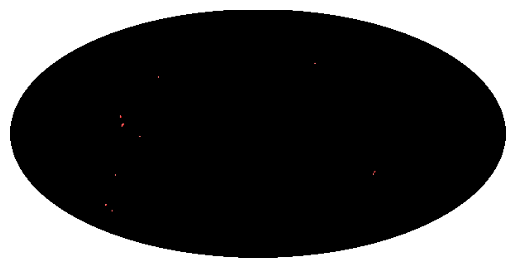

In [13]:
# retrieve the MOC
catalogue_coverage = MOC.from_fits(
    f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
)
catalogue_coverage.display_preview()

We can plot the coverage with ``matplotlib``.

In [14]:
fig = plt.figure(figsize=(5, 5))
wcs = catalogue_coverage.wcs(fig)
ax = fig.add_subplot(projection=wcs)
catalogue_coverage.fill(ax=ax, wcs=wcs, alpha=0.5, color="blue")

TypeError: WCSAxes.__init__() got multiple values for argument 'wcs'

<Figure size 500x500 with 0 Axes>

or with ipyaladin

In [15]:
aladin = Aladin()
aladin

Aladin(options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'overlay_sur…

We can add the tables and coverage in this ipyaladin window.

In [16]:
aladin.add_table(conesearch_records.to_table())

In [17]:
aladin.add_table(tap_records.to_table())

In [18]:
aladin.add_moc_from_URL(
    f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
    moc_options={"opacity": 0.5, "color": "pink"},
)

For more information about manipulating coverages, see [MOCpy documentation](https://cds-astro.github.io/mocpy/).